In [1]:
# Plot Surrogate Predictions
from gp_predict import *
import pandas as pd
import numpy as np
from diff_evolution_col import *
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns


def plot_hysteresis(hyst_data, style):
    
    plt.plot(hyst_data["disp"], hyst_data["force"], **style)
    plt.xlabel("Displacement")
    plt.ylabel("Force")

    pass


def get_backbone():

    pass 

def get_data():

    
    pass

In [2]:
ii = 0

# ------
# Here, call surrogate model for flexure failure
# ------
f_surrogate_dir = r'C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\flexure_pd_010_just_good_data'
f_template_dir = os.path.join(f_surrogate_dir, 'templatedir_SIM')

f_surrogate_file = f_surrogate_dir + r'\SimGpModel.json'

# load the merged_data.csv file
f_test_data = pd.read_csv(f_surrogate_dir + r'\test_data.csv')
f_test_data['data_type'] = 'test'

f_train_data = pd.read_csv(f_surrogate_dir + r'\train_data.csv')
f_train_data['data_type'] = 'train'

# ------
# Here, call surrogate model for shear failure
# ------
s_surrogate_dir = r'C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\combined_pd_005_just_good_data'
s_template_dir = os.path.join(f_surrogate_dir, 'templatedir_SIM')

s_surrogate_file = s_surrogate_dir + r'\SimGpModel.json'

# load the merged_data.csv file
s_test_data = pd.read_csv(s_surrogate_dir + r'\test_data.csv')
s_test_data['data_type'] = 'test'

s_train_data = pd.read_csv(s_surrogate_dir + r'\train_data.csv')
s_train_data['data_type'] = 'train'

# Combine the training and testing data
merged_data = pd.concat([f_train_data, f_test_data, s_train_data, s_test_data])

# Input_json is the same for both cases
input_json = r'C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json'

cal_params_index = np.arange(0, 14)
nd_params_index = np.arange(17, 23)

# Extract the calibrated and nondimensional parameters for both training and testing
cal_params_all = merged_data.iloc[:, cal_params_index]
nondim_params_all = merged_data.iloc[:, nd_params_index]

# Save the merged data
merged_data.to_csv(r'C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\merged_calibration_data.csv', index=False)

merged_data.head()

,eta1,kappa_k,kappa,sig,lam,mup,sigp,rsmax,n,alpha,...,name,PeakDrift,FailureType,ar,lrr,srr,alr,sdr,smr,data_type
0,1.268766,0.560342,0.989811,0.422157,0.508888,0.289958,0.655478,0.538570,6.108898,0.013199,...,"BRI No. 2 (Japan), spbaa1",0.035949,Flexure,0.166667,0.375176,0.002801,0.104919,1.157143,0.217488,train
1,1.302573,0.664521,1.019830,0.295417,0.379802,0.197480,0.396008,0.541934,6.798783,0.010121,...,"Vu et al. 1998, NH1",0.051059,Flexure,0.166667,0.293255,0.002958,0.148193,1.000000,0.310284,train
2,1.081939,1.690771,0.998811,0.344018,0.469761,0.716281,1.547362,0.550237,1.718216,0.008190,...,"Saatcioglu and Baingo 1999, RC4",0.044438,Flexure,0.151976,0.152553,0.012636,0.418754,0.900000,0.213547,train
3,0.519748,1.073142,1.006206,0.373530,0.341981,0.334443,0.679440,0.983444,2.987563,0.000982,...,"Arakawa et al. 1988, No. 16",0.035076,Flexure,0.611111,0.460800,0.007761,0.000000,0.480000,0.769404,train
4,0.707529,1.838275,1.049884,0.204735,0.383226,3.123346,2.097244,0.557611,5.624242,0.001463,...,"Lehman et al. 1998, 415",0.073409,Flexure,0.125000,0.448760,0.006615,0.281132,0.750000,0.333087,train


Davey 1975, No. 1
7
eta1                 0.695294
kappa_k              0.626197
kappa                1.010386
sig                  0.563346
lam                  0.214474
mup                  1.070838
sigp                  1.86367
rsmax                0.951193
n                     7.21617
alpha                0.005337
alpha1               7.324941
alpha2               0.081527
betam1               0.012912
gamma                1.292739
name           Graff, 2001,C8
PeakDrift            0.096042
FailureType           Flexure
ar                   0.212852
lrr                  0.163271
srr                   0.00629
alr                  0.102899
sdr                  1.181102
smr                  0.245207
data_type               train
Name: 7, dtype: object
Flexure-type failure
RMSE Calibrated: 0.007030410630192473, RMSE Surrogate: 0.011950515498879478


 c:\Users\Miguel.MIGUEL-DESK\.conda\envs\simcenter\lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning:divide by zero encountered in divide
 c:\Users\Miguel.MIGUEL-DESK\.conda\envs\simcenter\lib\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning:divide by zero encountered in divide
 c:\Users\Miguel.MIGUEL-DESK\.conda\envs\simcenter\lib\site-packages\numpy\lib\function_base.py:1244: RuntimeWarning:divide by zero encountered in divide
 c:\Users\Miguel.MIGUEL-DESK\.conda\envs\simcenter\lib\site-packages\numpy\lib\function_base.py:1250: RuntimeWarning:invalid value encountered in add


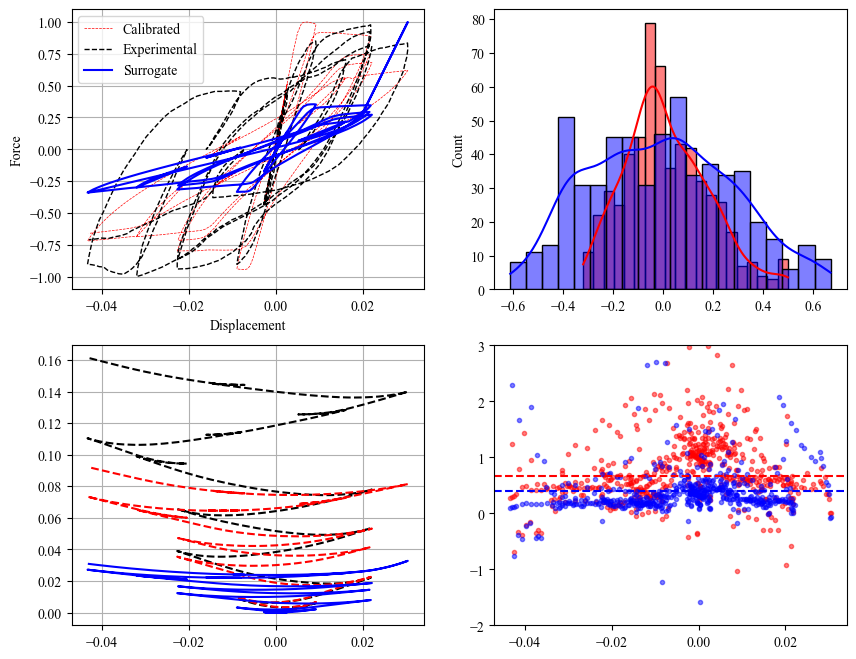

Davey 1975, No. 2
5
eta1                    1.478835
kappa_k                  5.31451
kappa                   0.976617
sig                      0.38642
lam                     0.748542
mup                     2.441889
sigp                    0.314088
rsmax                   0.637786
n                       1.198469
alpha                   0.007345
alpha1                  4.025868
alpha2                  1.336204
betam1                  0.005919
gamma                   1.376716
name           Davey 1975, No. 3
PeakDrift               0.035757
FailureType              Flexure
ar                      0.285714
lrr                     0.288749
srr                     0.001793
alr                     0.055613
sdr                          0.6
smr                     0.528389
data_type                  train
Name: 5, dtype: object
Flexure-type failure
RMSE Calibrated: 0.022074258049787878, RMSE Surrogate: 0.013611962785553567


 c:\Users\Miguel.MIGUEL-DESK\.conda\envs\simcenter\lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning:divide by zero encountered in divide
 c:\Users\Miguel.MIGUEL-DESK\.conda\envs\simcenter\lib\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning:divide by zero encountered in divide
 c:\Users\Miguel.MIGUEL-DESK\.conda\envs\simcenter\lib\site-packages\numpy\lib\function_base.py:1244: RuntimeWarning:divide by zero encountered in divide
 c:\Users\Miguel.MIGUEL-DESK\.conda\envs\simcenter\lib\site-packages\numpy\lib\function_base.py:1250: RuntimeWarning:invalid value encountered in add


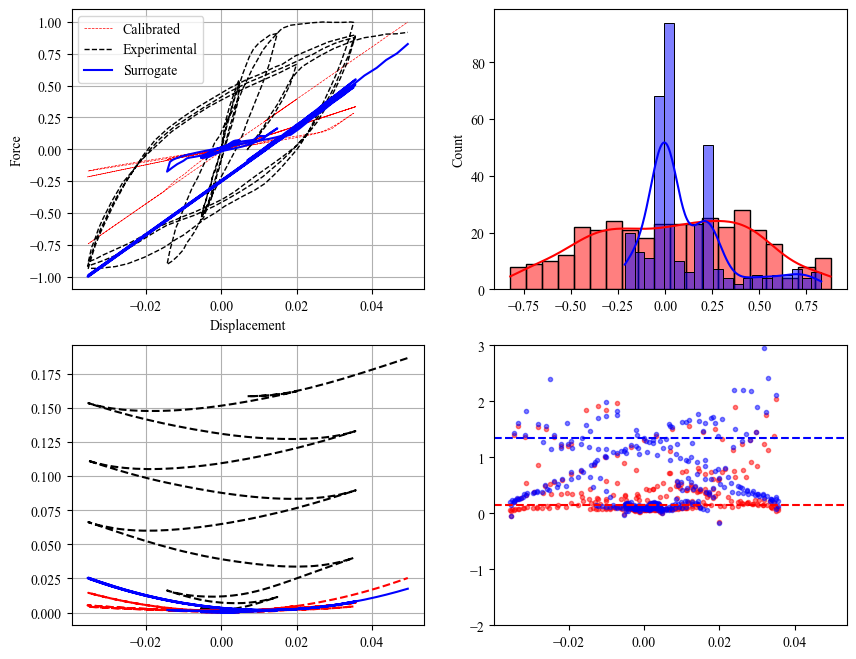

Davey 1975, No. 3
5
eta1                    1.478835
kappa_k                  5.31451
kappa                   0.976617
sig                      0.38642
lam                     0.748542
mup                     2.441889
sigp                    0.314088
rsmax                   0.637786
n                       1.198469
alpha                   0.007345
alpha1                  4.025868
alpha2                  1.336204
betam1                  0.005919
gamma                   1.376716
name           Davey 1975, No. 3
PeakDrift               0.035757
FailureType              Flexure
ar                      0.285714
lrr                     0.288749
srr                     0.001793
alr                     0.055613
sdr                          0.6
smr                     0.528389
data_type                  train
Name: 5, dtype: object
Flexure-type failure
RMSE Calibrated: 0.012503040268125088, RMSE Surrogate: 0.03809568460203403


 c:\Users\Miguel.MIGUEL-DESK\.conda\envs\simcenter\lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning:divide by zero encountered in divide
 c:\Users\Miguel.MIGUEL-DESK\.conda\envs\simcenter\lib\site-packages\numpy\lib\function_base.py:1244: RuntimeWarning:divide by zero encountered in divide
 c:\Users\Miguel.MIGUEL-DESK\.conda\envs\simcenter\lib\site-packages\numpy\lib\function_base.py:1250: RuntimeWarning:invalid value encountered in add
 C:\Users\Miguel.MIGUEL-DESK\AppData\Local\Temp\ipykernel_18752\53202792.py:123: RuntimeWarning:divide by zero encountered in divide
 C:\Users\Miguel.MIGUEL-DESK\AppData\Local\Temp\ipykernel_18752\53202792.py:131: RuntimeWarning:divide by zero encountered in divide
 C:\Users\Miguel.MIGUEL-DESK\AppData\Local\Temp\ipykernel_18752\53202792.py:132: RuntimeWarning:divide by zero encountered in divide


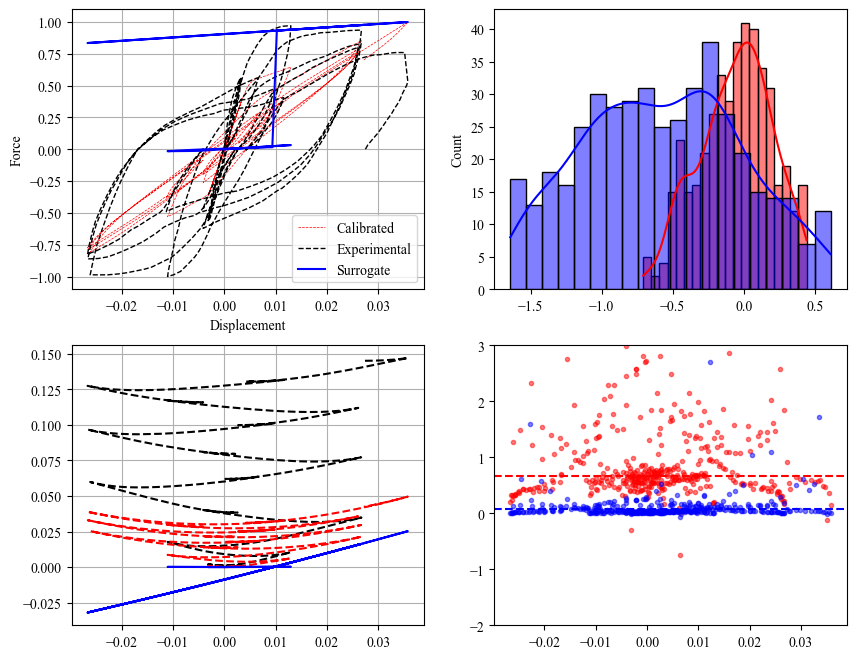

Munro et al. 1976, No. 1
16
eta1                           1.617294
kappa_k                        0.551926
kappa                          1.017993
sig                             0.14242
lam                            0.649311
mup                             1.03921
sigp                           0.494608
rsmax                          0.532812
n                               3.29963
alpha                          0.017042
alpha1                         4.291932
alpha2                         0.700062
betam1                         0.006451
gamma                          1.478985
name           Munro et al. 1976, No. 1
PeakDrift                      0.055538
FailureType                     Flexure
ar                             0.153846
lrr                            0.298894
srr                            0.002024
alr                            0.057258
sdr                                 0.6
smr                             0.36901
data_type                         train
Name: 16, dt

 c:\Users\Miguel.MIGUEL-DESK\.conda\envs\simcenter\lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning:divide by zero encountered in divide
 c:\Users\Miguel.MIGUEL-DESK\.conda\envs\simcenter\lib\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning:divide by zero encountered in divide
 c:\Users\Miguel.MIGUEL-DESK\.conda\envs\simcenter\lib\site-packages\numpy\lib\function_base.py:1244: RuntimeWarning:divide by zero encountered in divide
 c:\Users\Miguel.MIGUEL-DESK\.conda\envs\simcenter\lib\site-packages\numpy\lib\function_base.py:1250: RuntimeWarning:invalid value encountered in add
 C:\Users\Miguel.MIGUEL-DESK\AppData\Local\Temp\ipykernel_18752\53202792.py:123: RuntimeWarning:divide by zero encountered in divide
 C:\Users\Miguel.MIGUEL-DESK\AppData\Local\Temp\ipykernel_18752\53202792.py:131: RuntimeWarning:divide by zero encountered in divide
 C:\Users\Miguel.MIGUEL-DESK\AppData\Local\Temp\ipykernel_18752\53202792.py:132: RuntimeWarning:divide by zero encountered

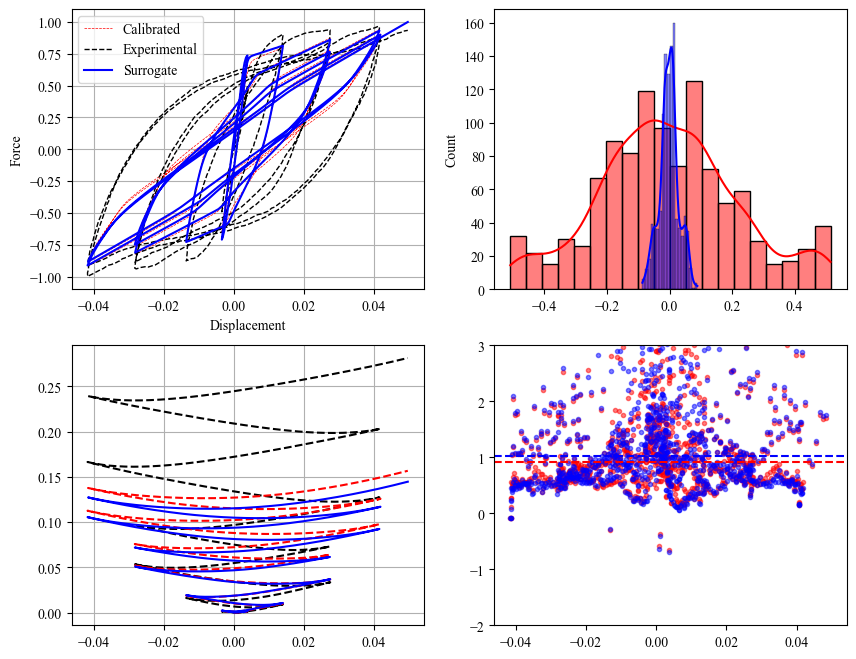

Ng et al. 1978, No. 2
38
eta1                        1.138895
kappa_k                     0.615178
kappa                       0.990485
sig                         0.127393
lam                         0.607689
mup                         0.419765
sigp                        1.385741
rsmax                        0.96663
n                           1.303237
alpha                       0.005371
alpha1                      7.799056
alpha2                      0.414857
betam1                      0.005461
gamma                       0.597973
name           Ng et al. 1978, No. 2
PeakDrift                   0.078142
FailureType                  Flexure
ar                           0.18315
lrr                         0.206522
srr                         0.002947
alr                         0.003361
sdr                         1.411765
smr                         0.115615
data_type                      train
Name: 38, dtype: object
Flexure-type failure


In [ ]:
# Find where the input data is
cwd = os.getcwd()
allfiles = os.listdir(os.path.join(cwd, 'calibrated_curves_02'))

# Need to add all data here... But I'll go to sleep for now 
# Tasks for tomorrow morning:

# (1) In the same code, run both models (pinching and no pinching)
# (2) In the same code, plot test and train data
# (3) Create database

columns = ['name', 'test_or_train', 'type', 'rmse_cal', 'rmse_sur', 'energy_cal', 'energy_sur', 'stiff_cal', 'stiff_sur', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6']

surrogate_performance_data = pd.DataFrame(columns=columns)

for file in allfiles[1::]:
    with open(os.path.join(cwd, 'calibrated_curves_02', file), 'r') as f:
        test_data = json.load(f)
    
    disp = test_data['data']['disp']
    force = test_data['data']['force']
    name = test_data['Name']
    print(name)

    try:
        # Find name in the Name column of the merged_data
        index = merged_data[merged_data['name'] == name].index[0]
        print(index)
        print(merged_data.iloc[index, :])
    except:
        print('Name not found')
        continue
    

    # Define data_type test or train
    data_type = merged_data.iloc[index, -1] 
    
    # Extract the calibrated and nondimensional parameters for both training and testing
    cal_params = merged_data.iloc[index, cal_params_index]
    nondim_params = merged_data.iloc[index, nd_params_index]
    
    params_list = [["RV_column1", nondim_params.iloc[0]],
               ["RV_column2", nondim_params.iloc[1]],
               ["RV_column3", nondim_params.iloc[2]],
               ["RV_column4", nondim_params.iloc[3]],
               ["RV_column5", nondim_params.iloc[4]], 
               ["RV_column6", nondim_params.iloc[5]]
               ]
    
    # Here, call surrogate model
    try:
        # Select the surrogate model
        if test_data['FailureType'] == 'Flexure':
            print('Flexure-type failure')
            surrogate_file = f_surrogate_file
        else:
            print('Shear-type failure')
            surrogate_file = s_surrogate_file

        params, variance = main(params_list, [], surrogate_file, 'dummyout.out', input_json)
        
        gp_predicted = []
            
        for vals in params[0]:
            gp_predicted.append(vals)
        
        # Run the model with calibrated parameters
        model_data_cal, exp_data = run_model(cal_params, test_data)

        # Run the model with surrogate predicted parameters
        model_data_sur, exp_data = run_model(gp_predicted, test_data)

        plt.figure(figsize=(10, 8))
        plt.subplot(2, 2, 1)
        plot_hysteresis(model_data_cal, {'color': 'red', 'linestyle': '--', 'label': 'Calibrated', 'linewidth': 0.5})
        plot_hysteresis(exp_data, {'color': 'black', 'linestyle': '--', 'label': 'Experimental', 'linewidth': 1.0})
        plot_hysteresis(model_data_sur, {'color': 'blue', 'linestyle': '-', 'label': 'Surrogate'})
        plt.grid()
        plt.legend()
    
        # Compute the residuals betweeen the experimental and model data
        '''residuals_cal = (exp_data['force'] - model_data_cal['force'])
        residuals_sur = (exp_data['force'] - model_data_sur['force'])
        rmse_cal = np.sqrt(np.mean(residuals_cal**2) / len(residuals_cal))
        rmse_sur = np.sqrt(np.mean(residuals_sur**2) / len(residuals_sur))
        print(f'RMSE Calibrated: {rmse_cal}, RMSE Surrogate: {rmse_sur}')'''
        
        # Calculate residuals with respect to calibrated curve instead of experimental data
        residuals_cal = (exp_data['force'] - model_data_cal['force'])        # keep the same
        residuals_sur = (model_data_cal['force'] - model_data_sur['force'])  # Surrogate residuals are with respect to calibrated curve
        rmse_cal = np.sqrt(np.mean(residuals_cal**2) / len(residuals_cal))   # keep the same
        rmse_sur = np.sqrt(np.mean(residuals_sur**2) / len(residuals_sur))   # Surrogate residuals are with respect to calibrated curve
        print(f'RMSE Calibrated: {rmse_cal}, RMSE Surrogate: {rmse_sur}')


        # Plot the residuals
        plt.subplot(2, 2, 2)
        sns.histplot(data=residuals_cal, bins=20, color='red', label='Calibrated Residuals', kde=True, alpha=0.5)
        sns.histplot(data=residuals_sur, bins=20, color='blue', label='Surrogate Residuals', kde=True, alpha=0.5)
        # plt.plot(exp_data['disp'], residuals_sur, 'b.', label='Surrogate Residuals')


        # Compute the cumulative energy dissipated
        energy_cal = sp.integrate.cumulative_trapezoid(model_data_cal['force'], exp_data['disp'], initial=0)
        energy_sur = sp.integrate.cumulative_trapezoid(model_data_sur['force'], exp_data['disp'], initial=0)
        energy_exp = sp.integrate.cumulative_trapezoid(exp_data['force'], exp_data['disp'], initial=0)

        energy_abs_cal = np.sum(np.sqrt((energy_cal - energy_exp)**2) / len(energy_exp))
        energy_abs_sur = np.sum(np.sqrt((energy_sur - energy_cal)**2) / len(energy_cal))  # Surrogate residuals are with respect to calibrated curve

        plt.subplot(2, 2, 3)
        plt.plot(exp_data['disp'], energy_exp, 'k--', label='Experimental Energy')
        plt.plot(exp_data['disp'], energy_cal, 'r--', label='Calibrated Energy')
        plt.plot(exp_data['disp'], energy_sur, 'b-', label='Surrogate Energy')
        plt.grid()

        # Compute the tangent stiffness
        tangent_stiffness_cal = np.gradient(model_data_cal['force'], model_data_cal['disp'])
        tangent_stiffness_sur = np.gradient(model_data_sur['force'], model_data_sur['disp'])
        tangent_stiffness_exp = np.gradient(exp_data['force'], exp_data['disp'])
        
        # Add trendlines for each
        stiff_ratio_cal = tangent_stiffness_cal / tangent_stiffness_exp
        stiff_ratio_sur = tangent_stiffness_sur / tangent_stiffness_cal

        # Plot mean
        mean_cal = np.median(stiff_ratio_cal[np.isfinite(stiff_ratio_cal)])
        mean_sur = np.median(stiff_ratio_sur[np.isfinite(stiff_ratio_sur)])

        plt.subplot(2, 2, 4)
        plt.plot(exp_data['disp'], tangent_stiffness_cal/tangent_stiffness_exp, '.', color='red', label='Calibrated Tangent Stiffness', alpha=0.5)
        plt.plot(exp_data['disp'], tangent_stiffness_sur/tangent_stiffness_exp, '.', color='blue', label='Surrogate Tangent Stiffness', alpha=0.5)
        plt.axhline(mean_cal, color='red', linestyle='--', label='Mean Calibrated')
        plt.axhline(mean_sur, color='blue', linestyle='--', label='Mean Surrogate')

        #plt.plot(exp_data['disp'], tangent_stiffness_cal/tangent_stiffness_exp, 'r.', label='Calibrated Tangent Stiffness')
        #plt.plot(exp_data['disp'], tangent_stiffness_sur/tangent_stiffness_exp, 'b.', label='Surrogate Tangent Stiffness')
        plt.ylim(-2.0, 3.0)
        plt.show()
        # cc += 1

        # Create a dataframe for the performance data of this single case, includin the nondimensional parameters
        performance_data = pd.DataFrame([[name, data_type, test_data['FailureType'], rmse_cal, rmse_sur, energy_abs_cal, energy_abs_sur, mean_cal, mean_sur] + list(nondim_params)], columns=columns)

        # Append to the main dataframe
        surrogate_performance_data = pd.concat([surrogate_performance_data, performance_data], ignore_index=True)

    except Exception as quepaso:
        print('Something happened')
        print(quepaso)
        continue

# Save the performance data to a CSV file
surrogate_performance_data.to_csv('surrogate_performance_data_new.csv', index=False)
    

In [ ]:
surrogate_performance_data

,name,test_or_train,type,rmse_cal,rmse_sur,energy_cal,energy_sur,stiff_cal,stiff_sur,a1,a2,a3,a4,a5,a6
